# Analysis of the fligth into the ceiling on 10/28/2024 #
Imports

In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [3]:
import vlc
import time
import pygame

In [4]:
def play_music(file_path):
    player = vlc.MediaPlayer(file_path)
    player.play()
    time.sleep(1)

    def get_music_time():
        player.get_time()

    def stop_music():
        player.stop()
    return get_music_time, stop_music

In [5]:
get_music_time, stop_music = play_music("bad_apple.mp3")

In [9]:
player = vlc.MediaPlayer("bad_apple.mp3")
player.play()

0

In [14]:
player.stop()

In [4]:
pygame.mixer.init()
pygame.mixer.music.load("bad_apple.mp3")
pygame.mixer.music.play()

error: dsp: No such audio device

In [20]:
pygame.mixer.music.get_pos()
pygame.mixer.music.stop()

In [2]:
# Load the JSON data from the file
with open('hardware_data.json', 'r') as file:
    data = json.load(file)

# Extract the "drone" data
drone_data = data.get("drone", {})

# Print out the keys for all the data types within "drone"
print("Keys in drone data:")
for key in drone_data.keys():
    print(f'\"{key}\",')

Keys in drone data:
"ae483log.p_x",
"ae483log.p_y",
"ae483log.p_z",
"ae483log.psi",
"ae483log.theta",
"ae483log.phi",
"ae483log.v_x",
"ae483log.v_y",
"ae483log.v_z",
"stateEstimate.x",
"stateEstimate.y",
"stateEstimate.z",
"stateEstimate.yaw",
"stateEstimate.pitch",
"stateEstimate.roll",
"stateEstimate.vx",
"stateEstimate.vy",
"stateEstimate.vz",
"ae483log.w_x",
"ae483log.w_y",
"ae483log.w_z",
"ae483log.n_x",
"ae483log.n_y",
"ae483log.r",
"ae483log.a_z",
"ae483log.p_x_des",
"ae483log.p_y_des",
"ae483log.p_z_des",
"ctrltarget.x",
"ctrltarget.y",
"ctrltarget.z",
"ae483log.m_1",
"ae483log.m_2",
"ae483log.m_3",
"ae483log.m_4",
"ae483log.p_x_mocap",
"ae483log.p_y_mocap",
"ae483log.p_z_mocap",
"ae483log.psi_mocap",
"ae483log.theta_mocap",
"ae483log.phi_mocap",
"extravars.set_motors",
"extravars.a_x",
"extravars.a_y",
"extravars.v_x_int",
"extravars.v_y_int",
"extravars.v_z_int",
"extravars.p_x_int",
"extravars.p_y_int",
"extravars.p_z_int",
"extravars.a_x_in_W",
"extravars.a_y_in_W",
"extrav

In [7]:
with open('bounds_test.json', 'r') as file:
    data = json.load(file)

# Extract the "drone" data
drone_data = data.get("drone", {})

for i in range(0, 24):
    if drone_data['debugvars.sum_'+str(i)]['data'][-1] == 2*i + 2*i +1:
        print(f'Var {i} is good!')
    else:
        print(f"Var {i} failed with {drone_data['debugvars.sum_'+str(i)]['data'][-1]}")


Var 0 is good!
Var 1 is good!
Var 2 is good!
Var 3 is good!
Var 4 is good!
Var 5 is good!
Var 6 is good!
Var 7 is good!
Var 8 is good!
Var 9 is good!
Var 10 is good!
Var 11 is good!
Var 12 is good!
Var 13 is good!
Var 14 is good!
Var 15 is good!
Var 16 is good!
Var 17 is good!
Var 18 is good!
Var 19 is good!
Var 20 is good!
Var 21 is good!
Var 22 is good!
Var 23 is good!


In [3]:
def plot_drone_data(file_path, plot_keys, start_trim=0, end_trim=0):
    # Load the JSON data from the file
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Extract the "drone" data
    drone_data = data.get("drone", {})

    # Filter data to include only specified plot keys
    filtered_data = {key: value for key, value in drone_data.items() if key in plot_keys}

    # Determine the number of subplots based on the number of keys in filtered data
    num_plots = len(filtered_data)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 3), sharex=False)

    # If there's only one key, make axes a list for compatibility
    if num_plots == 1:
        axes = [axes]

    # Iterate over each key in the filtered drone data and create a subplot
    for idx, (key, value) in enumerate(filtered_data.items()):
        time_data = value.get("time", [])
        y_data = value.get("data", [])

        # Convert start_trim and end_trim times to indices
        start_index = next((i for i, t in enumerate(time_data) if t >= start_trim), 0)
        end_index = next((i for i, t in enumerate(time_data) if t >= time_data[-1] - end_trim), len(time_data))

        # Apply trimming based on time values
        trimmed_time_data = time_data[start_index:end_index]
        trimmed_y_data = y_data[start_index:end_index]
        print(end_index)

        # Plot the trimmed time vs. data for each key
        # axes[idx].plot(trimmed_time_data, np.rad2deg(trimmed_y_data))
        axes[idx].scatter(trimmed_time_data, trimmed_y_data)
        
        # Set title and labels
        axes[idx].set_title(key)
        axes[idx].set_ylabel('')  # Leave y-axis label empty
        axes[idx].set_xlabel('Time [s]')
        axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
        axes[idx].grid()

        # Set x-axis limits to match the data range for each subplot
        axes[idx].set_xlim([trimmed_time_data[0], trimmed_time_data[-1]])

        # Prevent scientific notation on y-axis
        axes[idx].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

    plt.tight_layout()
    plt.show()

# # Example usage
# # plot_keys = ["ae483log.n_x", 
# #              "ae483log.n_y",
# #              "ae483log.r",
# #              "ae483log.a_z",
# #              "ae483log.p_z_des",
# #              "ae483log.m_1"]
             
# plot_drone_data('hardware.json', plot_keys, start_trim=0, end_trim=1)

898
898
898
898
898
774
774
774
774
774
774
92
92
92
92
92
92
1387
1387
1387
1387
1387
1387
684
684
684
684
684
684
118
118
118
118
118
118
710
710
710
710
710
710
1357
1357
1357
1357
1357
1357
82
82
82
82
82
82
729
729
729
729
729
729
486
486
486
486
486
486
54


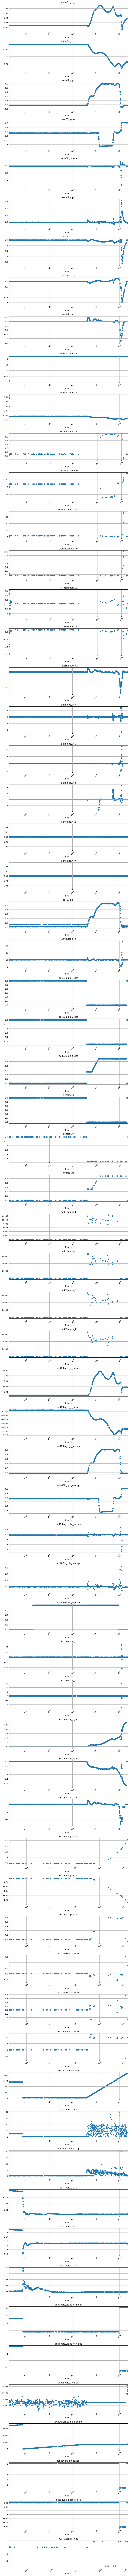

In [5]:
plot_keys = [
"ae483log.p_x",
"ae483log.p_y",
"ae483log.p_z",
"ae483log.psi",
"ae483log.theta",
"ae483log.phi",
"ae483log.v_x",
"ae483log.v_y",
"ae483log.v_z",
"stateEstimate.x",
"stateEstimate.y",
"stateEstimate.z",
"stateEstimate.yaw",
"stateEstimate.pitch",
"stateEstimate.roll",
"stateEstimate.vx",
"stateEstimate.vy",
"stateEstimate.vz",
"ae483log.w_x",
"ae483log.w_y",
"ae483log.w_z",
"ae483log.n_x",
"ae483log.n_y",
"ae483log.r",
"ae483log.a_z",
"ae483log.p_x_des",
"ae483log.p_y_des",
"ae483log.p_z_des",
"ctrltarget.x",
"ctrltarget.y",
"ctrltarget.z",
"ae483log.m_1",
"ae483log.m_2",
"ae483log.m_3",
"ae483log.m_4",
"ae483log.p_x_mocap",
"ae483log.p_y_mocap",
"ae483log.p_z_mocap",
"ae483log.psi_mocap",
"ae483log.theta_mocap",
"ae483log.phi_mocap",
"extravars.set_motors",
"extravars.a_x",
"extravars.a_y",
"extravars.v_x_int",
"extravars.v_y_int",
"extravars.v_z_int",
"extravars.p_x_int",
"extravars.p_y_int",
"extravars.p_z_int",
"extravars.a_x_in_W",
"extravars.a_y_in_W",
"extravars.a_z_in_W",
"extravars.flow_age",
"extravars.r_age",
"extravars.mocap_age",
"extravars.a_x_0",
"extravars.a_y_0",
"extravars.a_z_0",
"extravars.violation_index",
"extravars.violation_value",
"debugvars.d_carpet",
"debugvars.sample_count",
"debugvars.pxdesviol_l",
"debugvars.pxdesviol_u",
"extravars.psi_des",

             ]

plot_drone_data('hardware_data.json', plot_keys, start_trim=0, end_trim=0.0)